In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle
import tensorflow as tf

In [7]:
IMG_SIZE=90
# creating data pickle file 
def data_creating(main_folderPath):
    data=[]
    #retreive main path
    DATADIR=main_folderPath
    #creating  a dict categories with names folder
    folders= os.listdir(DATADIR)
    CATEGORIES={v:k for k ,v in enumerate(folders)}
   
    
    for ke,val in CATEGORIES.items():
        path_to_datas= os.path.join(DATADIR, ke)
        class_num= val
        for img in os.listdir(path_to_datas):
            try:
                img_arr= cv2.imread(os.path.join(path_to_datas, img))
                new_arr= cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([new_arr, class_num])
            except Exception as e:
                pass
    random.shuffle(data)
    x_data=[]
    y_data=[]
    
    for features , labels in data:
        x_data.append(features)
        y_data.append(labels)
    x_data= np.array(x_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y_data=np.array(y_data)
    
    pickle_out= open("x_data.pickle", "wb")
    pickle.dump(x_data, pickle_out)
    pickle_out.close()
    
    pickle_out= open("y_data.pickle", "wb")
    pickle.dump(y_data, pickle_out)
    pickle_out.close()
    print("x_data.pickle when opening features ======== y_data.pickle for labels ")
    print(CATEGORIES)

In [130]:
data_creating("C:/PetImages")
#labelisation

x_data.pickle when opening features ======== y_data.pickle for labels 
{'Boot': 0, 'Cat': 1, 'Dog': 2, 'Sandal': 3, 'Shoe': 4}


In [2]:
def load_data():
    pickle_in= open("x_data.pickle" ,"rb")
    features=pickle.load(pickle_in)

    pickle_in= open("y_data.pickle" ,"rb")
    labels=pickle.load(pickle_in)
    return(features, labels)

In [3]:
features, labels=load_data()
features.shape

(11951, 90, 90, 3)

In [ ]:
# plot data

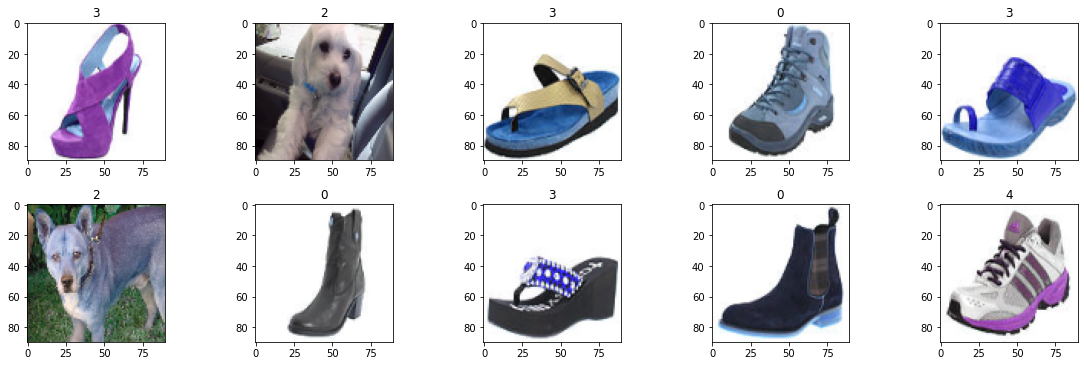

In [4]:
plt.figure(figsize=(16, 10))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(features[i])
    plt.title(labels[i])
    plt.tight_layout()
plt.show()

In [5]:
features= features/255.0

In [13]:
# preparing the cnn model
model= tf.keras.Sequential()

model.add(tf.keras.layers.Input((IMG_SIZE,IMG_SIZE,3)))
model.add(tf.keras.layers.Conv2D(128,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(16,(3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(150 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(5, activation="softmax"))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 88, 88, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 44, 44, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 44, 44, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 21, 21, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 21, 21, 64)       

In [15]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5,verbose=2)

In [16]:
model_historic= model.fit(features, labels, batch_size=20, epochs=12, verbose=1,callbacks=[stop], validation_split=0.2)

Epoch 1/12
478/478 [==============================] - 236s 486ms/step - loss: 0.9466 - accuracy: 0.5609 - val_loss: 0.6027 - val_accuracy: 0.7499
Epoch 2/12
478/478 [==============================] - 230s 482ms/step - loss: 0.5546 - accuracy: 0.7452 - val_loss: 0.4213 - val_accuracy: 0.8093
Epoch 3/12
478/478 [==============================] - 227s 475ms/step - loss: 0.4438 - accuracy: 0.7961 - val_loss: 0.3763 - val_accuracy: 0.8285
Epoch 4/12
478/478 [==============================] - 235s 493ms/step - loss: 0.3934 - accuracy: 0.8238 - val_loss: 0.3027 - val_accuracy: 0.8453
Epoch 5/12
478/478 [==============================] - 243s 508ms/step - loss: 0.3763 - accuracy: 0.8294 - val_loss: 0.3066 - val_accuracy: 0.8599
Epoch 6/12
478/478 [==============================] - 243s 509ms/step - loss: 0.3429 - accuracy: 0.8430 - val_loss: 0.2793 - val_accuracy: 0.8632
Epoch 7/12
478/478 [==============================] - 244s 510ms/step - loss: 0.3167 - accuracy: 0.8509 - val_loss: 0.2589 -

In [17]:
# display figure
#recup
loss_train_curve=model_historic.history["loss"]
loss_val_curve= model_historic.history["val_loss"]

acc_train_curve=model_historic.history["accuracy"]
acc_val_curve=model_historic.history["val_accuracy"]

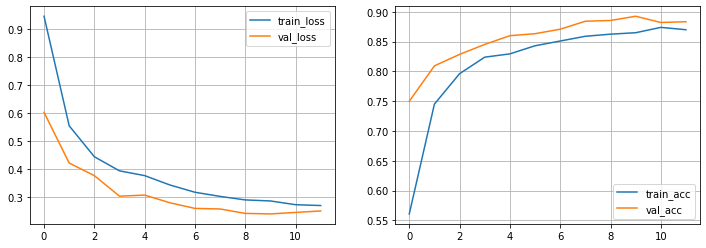

In [18]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(loss_train_curve, label="train_loss")
plt.plot(loss_val_curve, label="val_loss")
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc_train_curve, label="train_acc")
plt.plot(acc_val_curve, label="val_acc")
plt.grid()
plt.legend()

In [19]:


def prepare(filepath):
    img_arr=cv2.imread(filepath )
    new_arr=cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
    return new_arr.reshape(-1, IMG_SIZE, IMG_SIZE,3)



In [20]:
   def model_prediction(Imgpath, CATEGORIES=os.listdir("C:/PetImages")):
    
    prediction= model.predict([prepare(Imgpath)])
    ind=0
    for i in range(0,1):
        for j in range(0,prediction.shape[1]):
            if(prediction[i][j]==1):
                ind=j

    print(CATEGORIES[int(ind)])
    

In [35]:
model_prediction("C:/test/dog/40.jpg")


1/1 [==============================] - 0s 30ms/step
Sandal


In [23]:
def data_creating():
    data=[]
    DATADIR="C:/test"
    CATEGORIES={"Boot":0,"Cat":1, "Dog":2, "Sandal":3, "Shoe":4}
    IMG_SIZE=90
    
    for ke,val in CATEGORIES.items():
        path_to_datas= os.path.join(DATADIR, ke)
        class_num= val
        for img in os.listdir(path_to_datas):
            try:
                img_arr= cv2.imread(os.path.join(path_to_datas, img))
                new_arr= cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([new_arr, class_num])
            except Exception as e:
                pass
    random.shuffle(data)
    x_data=[]
    y_data=[]
    
    for features , labels in data:
        x_data.append(features)
        y_data.append(labels)
    x_data= np.array(x_data).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    y_data=np.array(y_data)
    
    pickle_out= open("x_test_data.pickle", "wb")
    pickle.dump(x_data, pickle_out)
    pickle_out.close()
    
    pickle_out= open("y_test_data.pickle", "wb")
    pickle.dump(y_data, pickle_out)
    pickle_out.close()
    print("x_data.pickle when opening features ======== y_data.pickle for labels ")
    
    

In [24]:
data_creating()

x_data.pickle when opening features ======== y_data.pickle for labels 


In [25]:
def load_data():
    pickle_in= open("x_test_data.pickle" ,"rb")
    features_test=pickle.load(pickle_in)

    pickle_in= open("y_test_data.pickle" ,"rb")
    labels_test=pickle.load(pickle_in)
    return(features_test, labels_test)

In [26]:
features_test, labels_test=load_data()
features_test.shape

(957, 90, 90, 3)

In [27]:
features_test= features_test/255.0

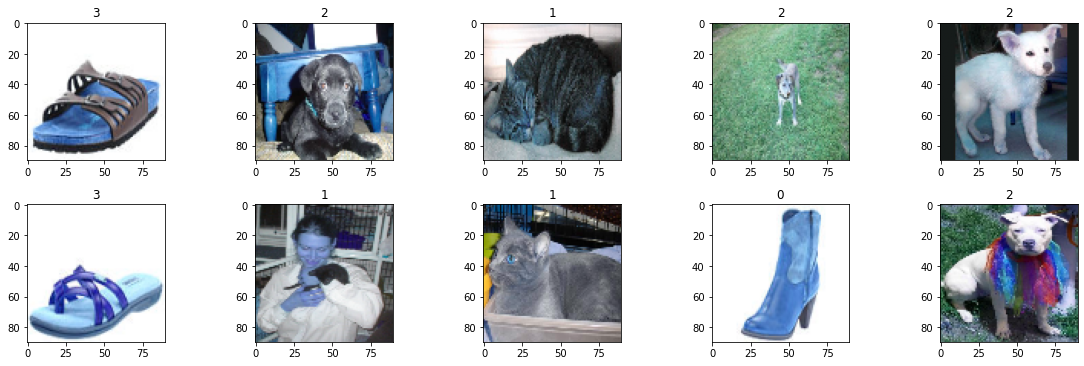

In [28]:
plt.figure(figsize=(16, 10))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(features_test[i])
    plt.title(labels_test[i])
    plt.tight_layout()
plt.show()

In [29]:
loss, acc=model.evaluate(features_test, labels_test, batch_size=10)
print(acc)

96/96 [==============================] - 5s 53ms/step - loss: 0.5803 - accuracy: 0.6928
0.6927899718284607


In [84]:
#save the model 
model.save("D:/cour info/cour machine Learning/models/shoes_model.h5")

['Boot', 'Cat', 'Dog', 'Sandal', 'Shoe']